In [ ]:
from preprocess import *
#import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from keras.utils import to_categorical
#import wandb
#from wandb.keras import WandbCallback
import matplotlib.pyplot as plt

Part 0: DFT

In [ ]:
# Let's look at a set of frequency components
N = 64   # Period
n = np.arange(4 * N + 1)  # indices

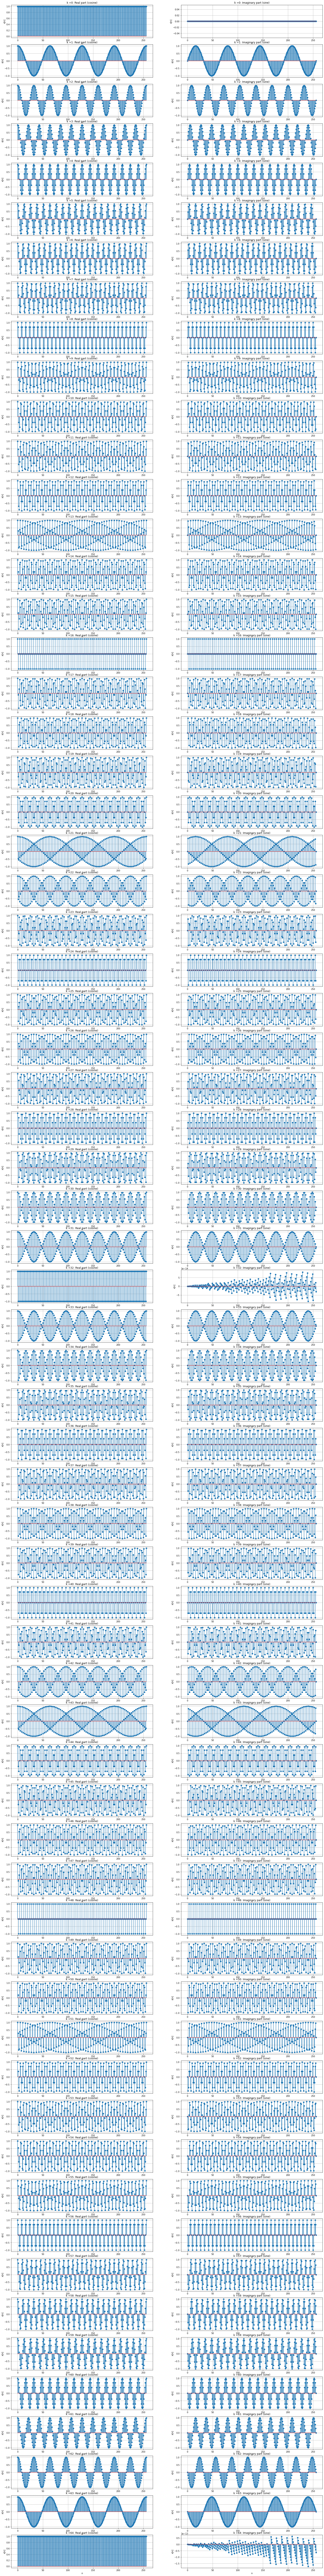

In [ ]:
plt.figure(figsize=(26, 220))
i = 0
x = np.zeros_like(n)
for k in range(N + 1):
  # Compute signal
  w = 2 * np.pi * n * k / N
  R = np.cos(w)
  I = np.sin(w)
  x = x + R + I # Summation for Inverse DFT

  # Plot them
  plt.subplot(N+1, 2, i+1)
  plt.title(f'k ={k}: Real part (cosine)')
  plt.stem(n, R, use_line_collection=True)
  plt.xlabel('n')
  plt.ylabel('x[n]')
  plt.grid()
  plt.subplot(N+1, 2, i+2)
  plt.title(f'k ={k}: Imaginary part (sine)')
  plt.stem(n, I, use_line_collection=True)
  plt.xlabel('n')
  plt.ylabel('x[n]')
  plt.grid()
  i = i + 2
plt.show()

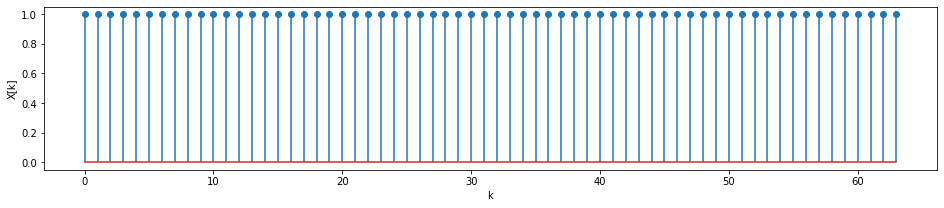

In [ ]:
# Corresponding signal in (discrete) frecquency domain
plt.figure(figsize=(16, 3))
plt.stem(n[:64], np.ones_like(n[:64]), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('X[k]')
plt.show()

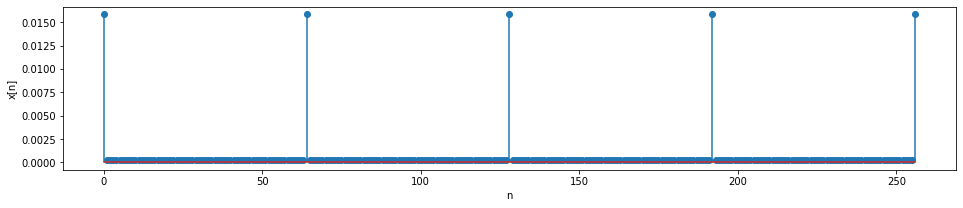

In [ ]:
# Corresponding signal in (discrete) time domain
x = x / 64.
plt.figure(figsize=(16, 3))
plt.stem(n, x, use_line_collection=True)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

In [ ]:
# El objetivo de esta tarea es entender el impacto de los componentes de magnitud y fase de la DFT.
#
# Juguemos con dos caciones:
# 1) Glen Miller - In The Mood; y
# 2) Cesárea Évora - Bésame Mucho.
# Seleccioné estas dos canciones dado que tienen ritmos notablemente distintos.
# Puedes jugar con otros pares si deseas.

Part 1: Load audio file and show its contents

In [ ]:
# Read audio file -- requires wav format
rate, audio_data = wavfile.read("InTheMood.wav")
N = audio_data.shape[0]
n = np.arange(N)

print("Rate:", rate, "Hz.")
print("Audio shape:", audio_data.shape)
print(f"Audio length: {N/rate:.2f} seconds.")
print('Data type: "', audio_data.dtype, '"')

Rate: 44100 Hz.
Audio shape: (9526272, 2)
Audio length: 216.02 seconds.
Data type: " int16 "


In [ ]:
# Create audio object to be played
Audio(audio_data.T, rate=rate)

In [ ]:
# Split channels
chann1 = audio_data[:, 0]
chann2 = audio_data[:, 1]

In [ ]:
# Create audio object to be played
Audio(chann1.T, rate=rate)

In [ ]:
# Create audio object to be played
Audio(chann2.T, rate=rate)

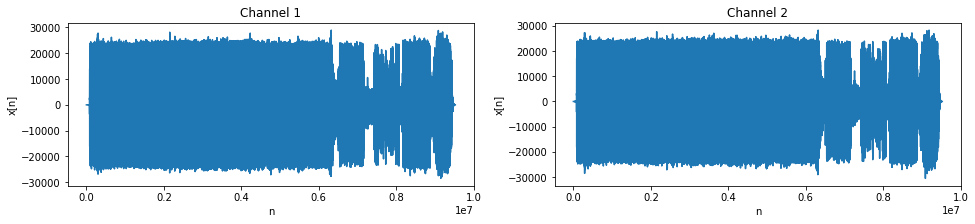

In [ ]:
# Plot
plt.figure(figsize=(16, 3))
plt.subplot(1, 2, 1)
plt.plot(n, chann1)
plt.title('Channel 1')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.subplot(1, 2, 2)
plt.plot(n, chann2)
plt.title('Channel 2')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

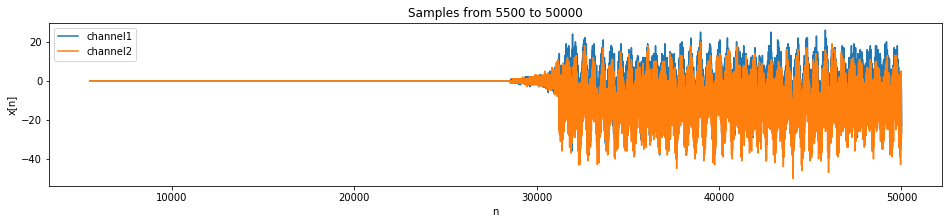

In [ ]:
# Plot just a part of them
plt.figure(figsize=(16, 3))
plt.title('Samples from 5500 to 50000')
plt.plot(n[5500:50000], chann1[5500:50000], label='channel1')
plt.plot(n[5500:50000], chann2[5500:50000], label='channel2')
plt.legend()
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

In [ ]:
# Lets use only channe 1
x1 = chann1

Part 2: DFT via FFT

In [ ]:
from scipy.fft import fft, ifft

In [ ]:
# Compute DFT
X = fft(x1)

print("Audio shape:", X.shape)
print('Data type: "', X.dtype, '"')

print(X.real.shape)
print(X.imag.shape)

Audio shape: (9526272,)
Data type: " complex128 "
(9526272,)
(9526272,)


In [ ]:
# Just to see the min and max values of both real and imaginary components
print(X.real.min(), ',\t', X.imag.min())
print(X.real.max(), ',\t', X.imag.max())

-1034112677.9080298 ,	 -993707132.8644845
943936548.9218252 ,	 993707132.8644845


In [ ]:
# == Q1 ==
# Crea una función que reciba como argumento los componentes real e imaginario de un número complejo,
# y que devuelva su magnitud y fase. Debe funcionar para escalares y vectores.
# En SyS vimos cómo hacer, o puedes googlearlo.
# HINT: "cartesian to polar"

# AUX function to change real and imaginary pairs into magnitude and phase pairs
def real_imag2magn_phas(real, imag):
    magn = # Tu código aquí
    phas = # Tu código aquí
    return magn, phas

In [ ]:
# == Q2 ==
# Crea una función que reciba como argumento los componentes de magnitud y fase,
# y que devuelva los componentes real e imaginario. Debe funcionar para escalares y vectores.
# En SyS vimos cómo hacer, o puedes googlearlo.
# HINT: "polar to cartesian"

# AUX function to change magnitude and phase pairs into real and imaginary pairs
def magn_phas2real_imag(magnitude, phase):
    real = # Tu código aquí
    imag = # Tu código aquí
    return real, imag

In [ ]:
# Compute magnitude and phase
X_magn, X_phas = real_imag2magn_phas(X.real, X.imag)

print(X_magn.min(), ',\t', X_phas.min())
print(X_magn.max(), ',\t', X_phas.max())

0.778290347655093 ,	 -3.141592653589793
1178902750.0902443 ,	 3.141592583609566


In [ ]:
# Map magnitude and phase back to real and imaginary (values must be the same as X.real and X.imag)
X_real, X_imag = magn_phas2real_imag(X_magn, X_phas)

print(X_real.min(), ',\t', X_imag.min())
print(X_real.max(), ',\t', X_imag.max())

-1034112677.9080298 ,	 -993707132.8644845
943936548.9218252 ,	 993707132.8644845


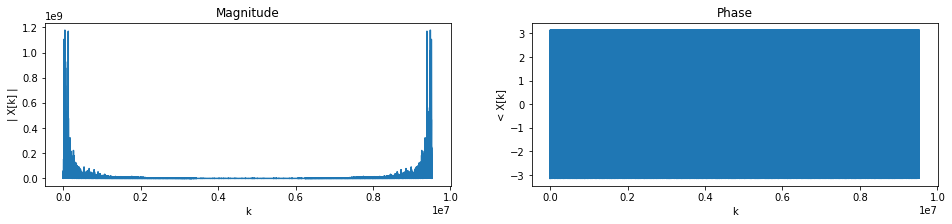

In [ ]:
# Plot magnitude and phase
plt.figure(figsize=(16, 3))
plt.subplot(1, 2, 1)
plt.title('Magnitude')
plt.plot(n, X_magn)
plt.xlabel('k')
plt.ylabel('| X[k] |')
plt.subplot(1, 2, 2)
plt.title('Phase')
plt.plot(n, X_phas)
plt.xlabel('k')
plt.ylabel('< X[k]')
plt.show()

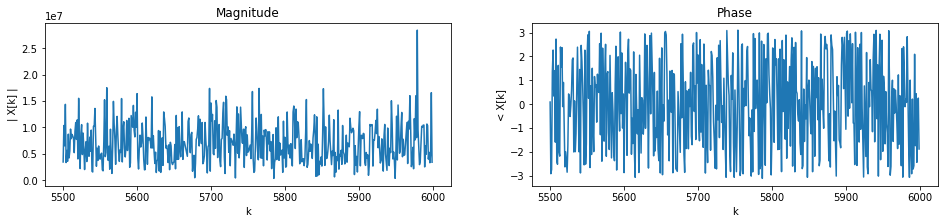

In [ ]:
# Plot just a subset
plt.figure(figsize=(16, 3))
plt.subplot(1, 2, 1)
plt.title('Magnitude')
plt.plot(n[5500:6000], X_magn[5500:6000])
plt.xlabel('k')
plt.ylabel('| X[k] |')
plt.subplot(1, 2, 2)
plt.title('Phase')
plt.plot(n[5500:6000], X_phas[5500:6000])
plt.xlabel('k')
plt.ylabel('< X[k]')
plt.show()

In [ ]:
# Find its inverse DFT and compute the reconstruction error
x_hat = ifft(X)

print(x1.shape)
print(x_hat.shape)

# Print a few samples, they must be equal
print('\n')
print(x1[20000:20050])
print(x_hat.real[20000:20050])

# Compute the reconstruction error
mse = norm(x_hat.real - x1) / len(x1)
print(f"\nmse: {mse:.2f} in {len(x1)} samples.")

(9526272,)
(9526272,)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[-3.00329756e-13  2.47772049e-12 -5.50604553e-12 -9.99847814e-12
 -3.44127846e-12 -2.56531667e-13  8.38420570e-13 -1.30142894e-12
 -1.75192358e-12  2.80307773e-12 -1.90208846e-12 -1.65181366e-12
 -7.15785919e-12  6.50714472e-13 -2.25247317e-12 -1.20131903e-12
 -5.10560586e-12 -2.05225334e-12 -2.30252813e-12  3.25357236e-12
 -6.38200732e-12  2.80307773e-12 -5.35588066e-12 -2.60285789e-12
 -1.80197854e-12 -1.00109919e-13  2.56688089e-12 -4.41109330e-13
 -4.12953415e-12  1.00172488e-11  8.19649960e-13 -1.73940984e-12
 -4.86784480e-12 -8.85972781e-12  7.15785919e-12 -1.00109919e-13
 -5.38090814e-13 -2.12733577e-12 -3.87925935e-13 -6.25686993e-13
 -7.88365611e-12  9.38530489e-13  2.75302277e-12 -8.45928814e-12
 -2.15236325e-12  2.21493195e-12  2.70296781e-12 -3.50384716e-13
  2.35258309e-12 -3.50384716e-13]

mse: 0.00 in 9526272 samples.


In [ ]:
# Attenuate magnitude to 50%, and convert back to cartesian format
X_real, X_imag = magn_phas2real_imag(0.50 * X_magn, X_phas)

print(X_real.min(), ',\t', X_imag.min())
print(X_real.max(), ',\t', X_imag.max())

-465350705.0586134 ,	 -447168209.78901803
424771447.01482135 ,	 447168209.78901803


In [ ]:
# Create a new complex vector with the attenuated signal, and compute IDFT
X2 = X.copy()
X2.real = X_real
X2.imag = X_imag

x_hat = ifft(X2)
Audio(x_hat.T, rate=rate)

In [ ]:
# == Q3 ==
# Escucha los primeros 30 segundos e indica si percibes algún tipo de distorsión, respecto al sonido del canal 1 original.

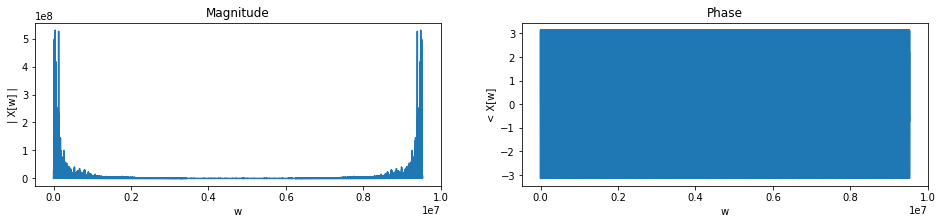

In [ ]:
# Compute again magnitude and phase, now of the modified signal. Show them.
X_magn, X_phas = real_imag2magn_phas(X2.real, X2.imag)

# Plot them
plt.figure(figsize=(16, 3))
plt.subplot(1, 2, 1)
plt.title('Magnitude')
plt.plot(n, X_magn)
plt.xlabel('w')
plt.ylabel('| X[w] |')
plt.subplot(1, 2, 2)
plt.title('Phase')
plt.plot(n, X_phas)
plt.xlabel('w')
plt.ylabel('< X[w]')
plt.show()

In [ ]:
# == Q4 ==
# ¿La magnitud y fase de la señal modificada muestra alguna diferencia respecto a la señal original?

In [ ]:
# Attenuate phase to 90%, and convert back to cartesian format
X_magn, X_phas = real_imag2magn_phas(X.real, X.imag) # Need to recompute them as we just modified them.
X_real, X_imag = magn_phas2real_imag(X_magn, 0.9 * X_phas)

print(X_real.min(), ',\t', X_imag.min())
print(X_real.max(), ',\t', X_imag.max())

-899404274.57415 ,	 -1062904238.2625866
963511429.0253615 ,	 1062904238.2625866


In [ ]:
# Create a new complex array with modified phase, and compute IDFT
X2 = X.copy()
X2.real = X_real
X2.imag = X_imag

x_hat = ifft(X2)
Audio(x_hat.T, rate=rate)

In [ ]:
# == Q5 ==
# Escucha el nuevo track e indica si percibes algún tipo de distorsión, respecto a al canal 1 original, y a la
# reconstrucción anterior con la magnitud modificada.

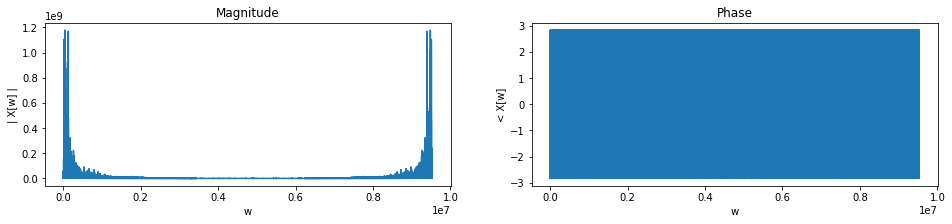

In [ ]:
# Compute and show magnitude and phase of modified signal
X_magn, X_phas = real_imag2magn_phas(X2.real, X2.imag)

# Plot them -- Notas alguna diferencia a simple vista_?
plt.figure(figsize=(16, 3))
plt.subplot(1, 2, 1)
plt.title('Magnitude')
plt.plot(n, X_magn)
plt.xlabel('w')
plt.ylabel('| X[w] |')
plt.subplot(1, 2, 2)
plt.title('Phase')
plt.plot(n, X_phas)
plt.xlabel('w')
plt.ylabel('< X[w]')
plt.show()

In [ ]:
# == Q6 ==
# ¿Hay alguna diferencia entre el espectro de la señal cuyo fase fue modificada y la señal original?

In [ ]:
# == Q7 ==
# ¿Puedes explicar qué hacen las siguientes tres celdas?

In [ ]:
# Compute loss varying magnitude by different amounts
X_magn, X_phas = real_imag2magn_phas(X.real, X.imag)

loss_magn = np.zeros((10))
for ind, c in enumerate(np.linspace(0.1, 1, 10)):
    X_real, X_imag = magn_phas2real_imag(c * X_magn, X_phas)
    X2 = X.copy()
    X2.real = X_real
    X2.imag = X_imag
    x_hat = ifft(X2).real
    loss_magn[ind] = norm(x_hat - x1) / len(x1)

In [ ]:
# Compute loss varying phase by different amounts
X_magn, X_phas = real_imag2magn_phas(X.real, X.imag)

loss_phas = np.zeros((10))
for ind, c in enumerate(np.linspace(0.1, 1, 10)):
    X_real, X_imag = magn_phas2real_imag(X_magn, c * X_phas)
    X2 = X.copy()
    X2.real = X_real
    X2.imag = X_imag
    x_hat = ifft(X2).real
    loss_phas[ind] = norm(x_hat - x1) / len(x1)

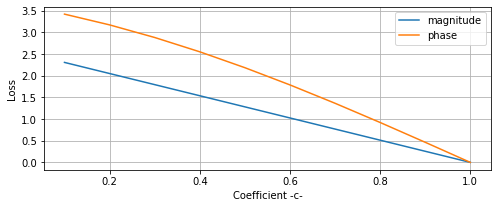

In [ ]:
# Plot and compare losses
plt.figure(figsize=(8, 3))
plt.plot(np.linspace(0.1, 1, 10), loss_magn, label='magnitude')
plt.plot(np.linspace(0.1, 1, 10), loss_phas, label='phase')
plt.legend()
plt.xlabel('Coefficient -c-')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [ ]:
# == Q8 ==
# Con base en los resultados de las tres últimas celdas, ¿Qué puedes concluir respecto al impacto
# que tiene modificar la magnitud y la fase de una señal? ¿A cuál de estos dos componentes parece ser
# más sensible la señal de entrada?

In [ ]:
# == Q9 ==
# Físicamente, ¿qué significa modificar la magnitud del espectro, y qué significa modificar su fase
# (cómo se ven afectadas las sinusoidales que componen la señal en el dominio del tiempo)?

Part 3: Load second song and combine them

In [ ]:
# Read 2nd audio file -- requires wav format
rate2, audio_data2 = wavfile.read("BesameMucho.wav")
N2 = audio_data2.shape[0]
n2 = np.arange(N2)

print("Rate:", rate2, "Hz.")
print("Audio shape:", audio_data2.shape)
print(f"Audio length: {N2/rate2:.2f} seconds.")

Rate: 44100 Hz.
Audio shape: (12909568, 2)
Audio length: 292.73 seconds.


In [ ]:
# Create audio object to be played
Audio(audio_data2.T, rate=rate2)

In [ ]:
# lets also use only channel 1
x2 = audio_data2[:, 0]
Audio(x2.T, rate=rate2)

In [ ]:
# Let us use only the firts 9M samples of each song
song1 = x1[:9000000].copy()
song2 = x2[:9000000].copy()

n = np.arange(9000000)

In [ ]:
# Compute DFT for both songs
X1 = fft(song1)
X2 = fft(song2)

In [ ]:
# Compute magnitude and phase for both songs
X1_magn, X1_phas = real_imag2magn_phas(X1.real, X1.imag)
X2_magn, X2_phas = real_imag2magn_phas(X2.real, X2.imag)

# Print info
print(X1_magn.min(), '--', X1_magn.max(), '--', X1_phas.min(), '--', X1_phas.max())
print(X2_magn.min(), '--', X2_magn.max(), '--', X2_phas.min(), '--', X2_phas.max())

3.2914068279320823 -- 1264881115.4701254 -- -3.141592653589793 -- 3.1415916126027073
0.24463816833176713 -- 819727626.1033037 -- -3.141591943433688 -- 3.141591943433688


In [ ]:
# Swap phases: put phase 2 in song 1
X_real, X_imag = magn_phas2real_imag(X1_magn, X2_phas)

X1_swap = X1.copy()
X1_swap.real = X_real
X1_swap.imag = X_imag

song1_swap = ifft(X1_swap)
Audio(song1_swap.T, rate=rate)

In [ ]:
# Swap phases: put phase 1 in song 2
X_real, X_imag = magn_phas2real_imag(X2_magn, X1_phas)

X2_swap = X2.copy()
X2_swap.real = X_real
X2_swap.imag = X_imag

song2_swap = ifft(X2_swap)
Audio(song2_swap.T, rate=rate)

In [ ]:
# == Q10 ==
# ¿Los resultados obtenidos intercambiando fases, comprueban tus respuestas anteriores?
# Justifica tu respuesta.